In [1]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('cumulative.csv')
data.head()
#data dictionary: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
# check data type
data.dtypes

rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2

In [43]:
# RF require complete dataset. Check for NAN values.
data.isna().any()

rowid                False
kepid                False
kepoi_name           False
kepler_name           True
koi_disposition      False
koi_pdisposition     False
koi_score             True
koi_fpflag_nt        False
koi_fpflag_ss        False
koi_fpflag_co        False
koi_fpflag_ec        False
koi_period           False
koi_period_err1       True
koi_period_err2       True
koi_time0bk          False
koi_time0bk_err1      True
koi_time0bk_err2      True
koi_impact            True
koi_impact_err1       True
koi_impact_err2       True
koi_duration         False
koi_duration_err1     True
koi_duration_err2     True
koi_depth             True
koi_depth_err1        True
koi_depth_err2        True
koi_prad              True
koi_prad_err1         True
koi_prad_err2         True
koi_teq               True
koi_teq_err1          True
koi_teq_err2          True
koi_insol             True
koi_insol_err1        True
koi_insol_err2        True
koi_model_snr         True
koi_tce_plnt_num      True
k

In [48]:
#instead of dropping columns, impute mean for missing values.
data = data.fillna(data.mean())
data.isna().any()

rowid                False
kepid                False
kepoi_name           False
kepler_name           True
koi_disposition      False
koi_pdisposition     False
koi_score            False
koi_fpflag_nt        False
koi_fpflag_ss        False
koi_fpflag_co        False
koi_fpflag_ec        False
koi_period           False
koi_period_err1      False
koi_period_err2      False
koi_time0bk          False
koi_time0bk_err1     False
koi_time0bk_err2     False
koi_impact           False
koi_impact_err1      False
koi_impact_err2      False
koi_duration         False
koi_duration_err1    False
koi_duration_err2    False
koi_depth            False
koi_depth_err1       False
koi_depth_err2       False
koi_prad             False
koi_prad_err1        False
koi_prad_err2        False
koi_teq              False
koi_teq_err1          True
koi_teq_err2          True
koi_insol            False
koi_insol_err1       False
koi_insol_err2       False
koi_model_snr        False
koi_tce_plnt_num     False
k

In [49]:
# create X & y
# Features
# Remove string type columns and columns with missing values
remove_features=['rowid', 'kepid','kepoi_name','kepler_name',
                 'koi_disposition','koi_pdisposition', 'koi_tce_delivname', 
                 "koi_teq_err1", "koi_teq_err2"]
X = data.drop(remove_features, axis=1)  
# Label
y=data['koi_disposition'] 

In [50]:
#check distribution of outcomes
y.value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [51]:
# split data into train/test
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
# Scale features
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_trained_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [53]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets
clf.fit(X_trained_scaled,y_train)

y_pred=clf.predict(X_test_scaled)

In [54]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.894773519163763


In [55]:
# create series of features and their importances
feature_names = list(X.columns) 
feature_imp = sorted(zip(clf.feature_importances_, feature_names), reverse=True)
sorted_features = pd.DataFrame(feature_imp, columns=['Score', 'Feature'])
sorted_features

,Score,Feature
0,0.223218,koi_score
1,0.079806,koi_fpflag_nt
2,0.058405,koi_fpflag_co
3,0.051740,koi_model_snr
4,0.044270,koi_fpflag_ss
5,0.040487,koi_prad
6,0.030595,koi_steff_err1
7,0.030034,koi_duration_err2
8,0.028481,koi_duration_err1
9,0.025059,koi_prad_err1


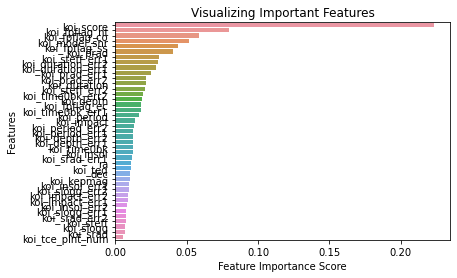

In [56]:
# plot feature importances
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x="Score", y="Feature", data=sorted_features)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [72]:
# create subset of features with highest feature importance
features = []
for feature in feature_imp:
    if feature[0] > 0.01:
        features.append(feature[1])
features

['koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_co',
 'koi_model_snr',
 'koi_fpflag_ss',
 'koi_prad',
 'koi_steff_err1',
 'koi_duration_err2',
 'koi_duration_err1',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_duration',
 'koi_steff_err2',
 'koi_time0bk_err2',
 'koi_depth',
 'koi_fpflag_ec',
 'koi_time0bk_err1',
 'koi_period',
 'koi_impact',
 'koi_period_err2',
 'koi_period_err1',
 'koi_depth_err2',
 'koi_depth_err1',
 'koi_time0bk',
 'koi_insol',
 'koi_srad_err1',
 'ra',
 'koi_teq',
 'dec',
 'koi_kepmag']

In [73]:
# create new X & y
# Features
updated_X = data[features]
# Label
updated_y=data['koi_disposition'] 

In [74]:
# split data into train/test
X_train, X_test, y_train, y_test = train_test_split(updated_X, updated_y, test_size=0.3) 

In [75]:
# Scale features
X_scaler = MinMaxScaler().fit(X_train)

X_trained_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets 
clf.fit(X_trained_scaled,y_train)

y_pred=clf.predict(X_test_scaled)

In [77]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8993031358885017


In [80]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_trained_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [81]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 200}

In [82]:
# use tuned model
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=9, criterion='gini')
rfc.fit(X_trained_scaled, y_train)
pred=rfc.predict(X_test_scaled)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

In [ ]:
# look at predictions of tuned model
predictions = {
    'Actual': y_test,
    'Prediction': pred
}

predict_df = pd.DataFrame(predictions)
predict_df = predict_df.set_index('Actual').reset_index()
predict_df.head(10)